In [1]:
import os
os.chdir("..")
os.chdir("../src")
from tool_preprocess import preprocesing_function_paraforest
os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes.csv", low_memory=False)
df.drop(columns=["Unnamed: 0"], inplace=True)

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d

In [2]:
import os
os.getcwd()

'c:\\Users\\unaif\\OneDrive\\Documentos\\Documentos_Clase_Data\\PROYECTOS\\nombre_proyecto_final_ML\\Projecto-Final-ML\\data'

In [3]:
df

Complaint ID          Product                   Sub-product  \
0           1291006  Debt collection                           NaN   
1           1290580  Debt collection                       Medical   
2           1290564         Mortgage                  FHA mortgage   
3           1291615      Credit card                           NaN   
4           1292165  Debt collection      Non-federal student loan   
...             ...              ...                           ...   
28151       1178184  Debt collection                           NaN   
28152       1178183    Consumer loan                  Vehicle loan   
28153       1178182         Mortgage   Conventional fixed mortgage   
28154       1178181      Payday loan                           NaN   
28155       1178180  Money transfers  Domestic (US) money transfer   

                                          Issue  \
0                         Communication tactics   
1         Cont'd attempts collect debt not owed   
2      Application, originator, mortgage broker   
3                                         Other   
4         Cont'd attempts collect debt not owed   
...                                         ...   
28151     Cont'd attempts collect debt not owed   
28152              Taking out the loan or lease   
28153  Loan servicing, payments, escrow account   
28154        Can't stop charges to bank account   
28155                  Other transaction issues   

                               Sub-issue State  ZIP code Date received  \
0             Frequent or repeated calls    TX   76119.0    2015-03-19   
1                       Debt is not mine    TX   77479.0    2015-03-19   
2                                    NaN    MA    2127.0    2015-03-19   
3                                    NaN    CA   92592.0    2015-03-19   
4      Debt resulted from identity theft   NaN   43068.0    2015-03-19   
...                                  ...   ...       ...           ...   
28151                   Debt is not mine    TX   75201.0    2015-01-01   
28152                                NaN    GA   30043.0    2015-01-01   
28153                                NaN    MN   55105.0    2015-01-01   
28154                                NaN    CA   92509.0    2015-01-01   
28155                                NaN    OH   45068.0    2015-01-01   

      Date sent to company                               Company  \
0               2015-03-19           Premium Asset Services, LLC   
1               2015-03-19  Accounts Receivable Consultants Inc.   
2               2015-03-19                          RBS Citizens   
3               2015-03-19                              Navy FCU   
4               2015-03-19               Transworld Systems Inc.   
...                    ...                                   ...   
28151           2015-01-02        Enhanced Recovery Company, LLC   
28152           2015-01-07                             DriveTime   
28153           2015-01-02                               Regions   
28154           2015-01-07                         Moneytree Inc   
28155           2015-01-02                                PayPal   

                      Company response Timely response? Consumer disputed?  
0                          In progress              Yes                NaN  
1              Closed with explanation              Yes                NaN  
2              Closed with explanation              Yes                Yes  
3                          In progress              Yes                NaN  
4                          In progress              Yes                NaN  
...                                ...              ...                ...  
28151  Closed with non-monetary relief              Yes                 No  
28152          Closed with explanation              Yes                NaN  
28153  Closed with non-monetary relief              Yes                 No  
28154          Closed with explanation              Yes                NaN  


Queremos predecir si tendra una timely response o no.
Segyun el EDA la compañia no tiene importancia, 
tampoco tiene sentido que dejemos las quejas que esten en progreso.


In [4]:
df.drop(columns=["Company"], inplace=True)
df=df[df["Company response"]!="In progress"]

In [5]:
df_processed = preprocesing_function_paraforest(df)
df_processed.head()

c:\Users\unaif\OneDrive\Documentos\Documentos_Clase_Data\PROYECTOS\nombre_proyecto_final_ML\Projecto-Final-ML\src\tool_preprocess.py:326: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ZIP code"].fillna(000, inplace=True)
c:\Users\unaif\OneDrive\Documentos\Documentos_Clase_Data\PROYECTOS\nombre_proyecto_final_ML\Projecto-Final-ML\src\tool_preprocess.py:329: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0.

Complaint ID  Product  Sub-product  Issue  Sub-issue  State  ZIP code  \
1       1290580        4           21     24         11     50     77479   
2       1290564        6           11      7         45     23      2127   
6       1288848        1           19     60         45     40     44241   
7       1288788        4           31     23          6      7     95124   
8       1288324        4           26     24         14     36      7067   

  Date received Date sent to company  Company response  Timely response?  \
1    2015-03-19           2015-03-19                 1                 1   
2    2015-03-19           2015-03-19                 1                 1   
6    2015-03-18           2015-03-18                 1                 1   
7    2015-03-18           2015-03-18                 1                 1   
8    2015-03-18           2015-03-18                 3                 1   

   Consumer disputed?  
1                   1  
2                   2  
6                   2  
7                   1  
8                   1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25466 entries, 1 to 28155
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Complaint ID          25466 non-null  int64  
 1   Product               25466 non-null  object 
 2   Sub-product           15865 non-null  object 
 3   Issue                 25464 non-null  object 
 4   Sub-issue             12060 non-null  object 
 5   State                 25075 non-null  object 
 6   ZIP code              25216 non-null  float64
 7   Date received         25466 non-null  object 
 8   Date sent to company  25466 non-null  object 
 9   Company response      25466 non-null  object 
 10  Timely response?      25466 non-null  object 
 11  Consumer disputed?    6006 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.5+ MB


In [7]:
X=df_processed.drop(columns=["Complaint ID", "Timely response?", "Consumer disputed?", "ZIP code","Date received"	,"Date sent to company"])

In [8]:
y=df_processed["Timely response?"]

In [9]:
from imblearn.over_sampling import ADASYN

In [10]:
X_resampled, y_resampled = ADASYN().fit_resample(X, y)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)

In [12]:
X_train

Product  Sub-product  Issue  Sub-issue  State  Company response
3529         4           39     24         11     50                 1
3110         2           39     22         45      7                 1
21100        3           39     83         28     50                 1
37281        4           21     24         14     39                 1
22715        0            4      1         45     18                 1
...        ...          ...    ...        ...    ...               ...
11284        3           39     49          1     12                 1
44732        4           21     37         37     37                 6
38158        1           37     53         45      7                 6
860          3           39     49         20     38                 1
15795        6           11     54         45     48                 1

[39635 rows x 6 columns]

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
"""tree_class=DecisionTreeClassifier(criterion= "gini", max_depth=40, min_samples_leaf=10, random_state=24)"""

'tree_class=DecisionTreeClassifier(criterion= "gini", max_depth=40, min_samples_leaf=10, random_state=24)'

In [15]:
"""tree_class=DecisionTreeClassifier(criterion= "gini", max_depth=7, min_samples_leaf=5, random_state=24)"""

'tree_class=DecisionTreeClassifier(criterion= "gini", max_depth=7, min_samples_leaf=5, random_state=24)'

In [16]:
tree_class1=DecisionTreeClassifier( random_state=42)

In [17]:
range(1,15)

range(1, 15)

In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth":list(range(1,40)), 
    "min_samples_leaf":list(range(1,15)),

}

tree_class = GridSearchCV(estimator = tree_class1,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy", 
                  refit=True)

In [19]:
tree_class.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14]},
             scoring='accuracy')

In [20]:

results = pd.DataFrame(tree_class.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.020214      0.006257         0.003507        0.000944   
1          0.015444      0.002102         0.002874        0.001043   
2          0.014158      0.000993         0.003049        0.000928   
3          0.012947      0.001860         0.002504        0.001538   
4          0.012592      0.001373         0.002371        0.000802   
...             ...           ...              ...             ...   
1087       0.055985      0.002243         0.002913        0.000660   
1088       0.052545      0.002435         0.002455        0.000760   
1089       0.049220      0.003055         0.002610        0.000882   
1090       0.049189      0.002331         0.003156        0.000858   
1091       0.043125      0.004872         0.001666        0.001733   

     param_criterion  param_max_depth  param_min_samples_leaf  \
0               gini                1                       1   
1               gini                1                       2   
2               gini                1                       3   
3               gini                1                       4   
4               gini                1                       5   
...              ...              ...                     ...   
1087         entropy               39                      10   
1088         entropy               39                      11   
1089         entropy               39                      12   
1090         entropy               39                      13   
1091         entropy               39                      14   

                                                 params  split0_test_score  \
0     {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.729566   
1     {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.729566   
2     {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.729566   
3     {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.729566   
4     {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.729566   
...                                                 ...                ...   
1087  {'criterion': 'entropy', 'max_depth': 39, 'min...           0.909435   
1088  {'criterion': 'entropy', 'max_depth': 39, 'min...           0.908426   
1089  {'criterion': 'entropy', 'max_depth': 39, 'min...           0.904137   
1090  {'criterion': 'entropy', 'max_depth': 39, 'min...           0.900353   
1091  {'criterion': 'entropy', 'max_depth': 39, 'min...           0.897578   

      split1_test_score  ...  split3_test_score  split4_test_score  \
0              0.720989  ...           0.733602           0.739909   
1              0.720989  ...           0.733602           0.739909   
2              0.720989  ...           0.733602           0.739909   
3              0.720989  ...           0.733602           0.739909   
4              0.720989  ...           0.733602           0.739909   
...                 ...  ...                ...                ...   
1087           0.903885  ...           0.920030           0.912462   
1088           0.902119  ...           0.917255           0.912967   
1089           0.900605  ...           0.916246           0.910444   
1090           0.902876  ...           0.915489           0.909183   
1091           0.903128  ...           0.914733           0.904894   

      split5_test_score  split6_test_score  split7_test_score  \
0              0.728993           0.731012           0.731264   
1              0.728993           0.731012           0.731264   
2              0.728993           0.731012           0.731264   
3              0.728993           0.731012           0.731264   
4              0.728993           0.731012           0.731264   
...                 ...                ...                ...   
1087           0.911683           0.908150           0.906384   
1088           0.909917           0.905879           0.900076   
1089           0.9076

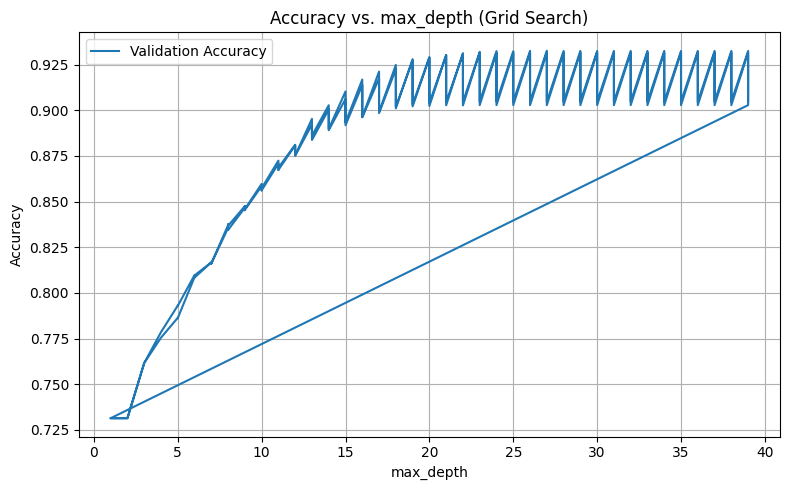

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(results['param_max_depth'], results['mean_test_score'],  label='Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_depth (Grid Search)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Segun grid search el limite es 25 ya que se complica demasiado para lo que sube la precisios. aunque y lo dejaria en antes pero asi sw consigue una precidison del 93%


In [22]:
tree_class.best_params_

{'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 1}

In [23]:
tree_class_def=DecisionTreeClassifier(**tree_class.best_params_)
tree_class_def.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=27)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = tree_class_def.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, normalize='true'))


Accuracy: 0.9282470481380564
Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.94      0.93      5014
         Yes       0.94      0.92      0.93      4895

    accuracy                           0.93      9909
   macro avg       0.93      0.93      0.93      9909
weighted avg       0.93      0.93      0.93      9909

Confusion Matrix:
[[0.93897088 0.06102912]
 [0.08273749 0.91726251]]


In [25]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(tree_class_def, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

0.9323830383112407
0.003531206521847771


In [26]:
feature_names = X_train.columns  # si X_train es un DataFrame
# Si no tienes nombres, puedes usar por defecto: feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# Obtener importancia
importances = tree_class_def.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

            Feature  Importance
5  Company response    0.378489
4             State    0.172830
3         Sub-issue    0.129713
0           Product    0.118883
1       Sub-product    0.117217
2             Issue    0.082869


[Text(0.6226279033483402, 0.9821428571428571, 'Company response <= 3.5\nentropy = 1.0\nsamples = 39635\nvalue = [19719, 19916]'),
 Text(0.2470310859333103, 0.9464285714285714, 'Product <= 3.5\nentropy = 0.933\nsamples = 30561\nvalue = [10646, 19915]'),
 Text(0.4348294946408252, 0.9642857142857142, 'True  '),
 Text(0.0668156853317553, 0.9107142857142857, 'Sub-product <= 38.5\nentropy = 0.555\nsamples = 10359\nvalue = [1338, 9021]'),
 Text(0.03859383090465271, 0.875, 'Sub-issue <= 44.5\nentropy = 0.82\nsamples = 3049\nvalue = [780, 2269]'),
 Text(0.038002071159109405, 0.8392857142857143, 'entropy = 0.0\nsamples = 341\nvalue = [341, 0]'),
 Text(0.03918559065019602, 0.8392857142857143, 'Product <= 0.5\nentropy = 0.639\nsamples = 2708\nvalue = [439.0, 2269.0]'),
 Text(0.025704563947037504, 0.8035714285714286, 'State <= 8.5\nentropy = 0.353\nsamples = 2072\nvalue = [138, 1934]'),
 Text(0.025112804201494192, 0.7678571428571429, 'entropy = 0.0\nsamples = 381\nvalue = [0, 381]'),
 Text(0.026296

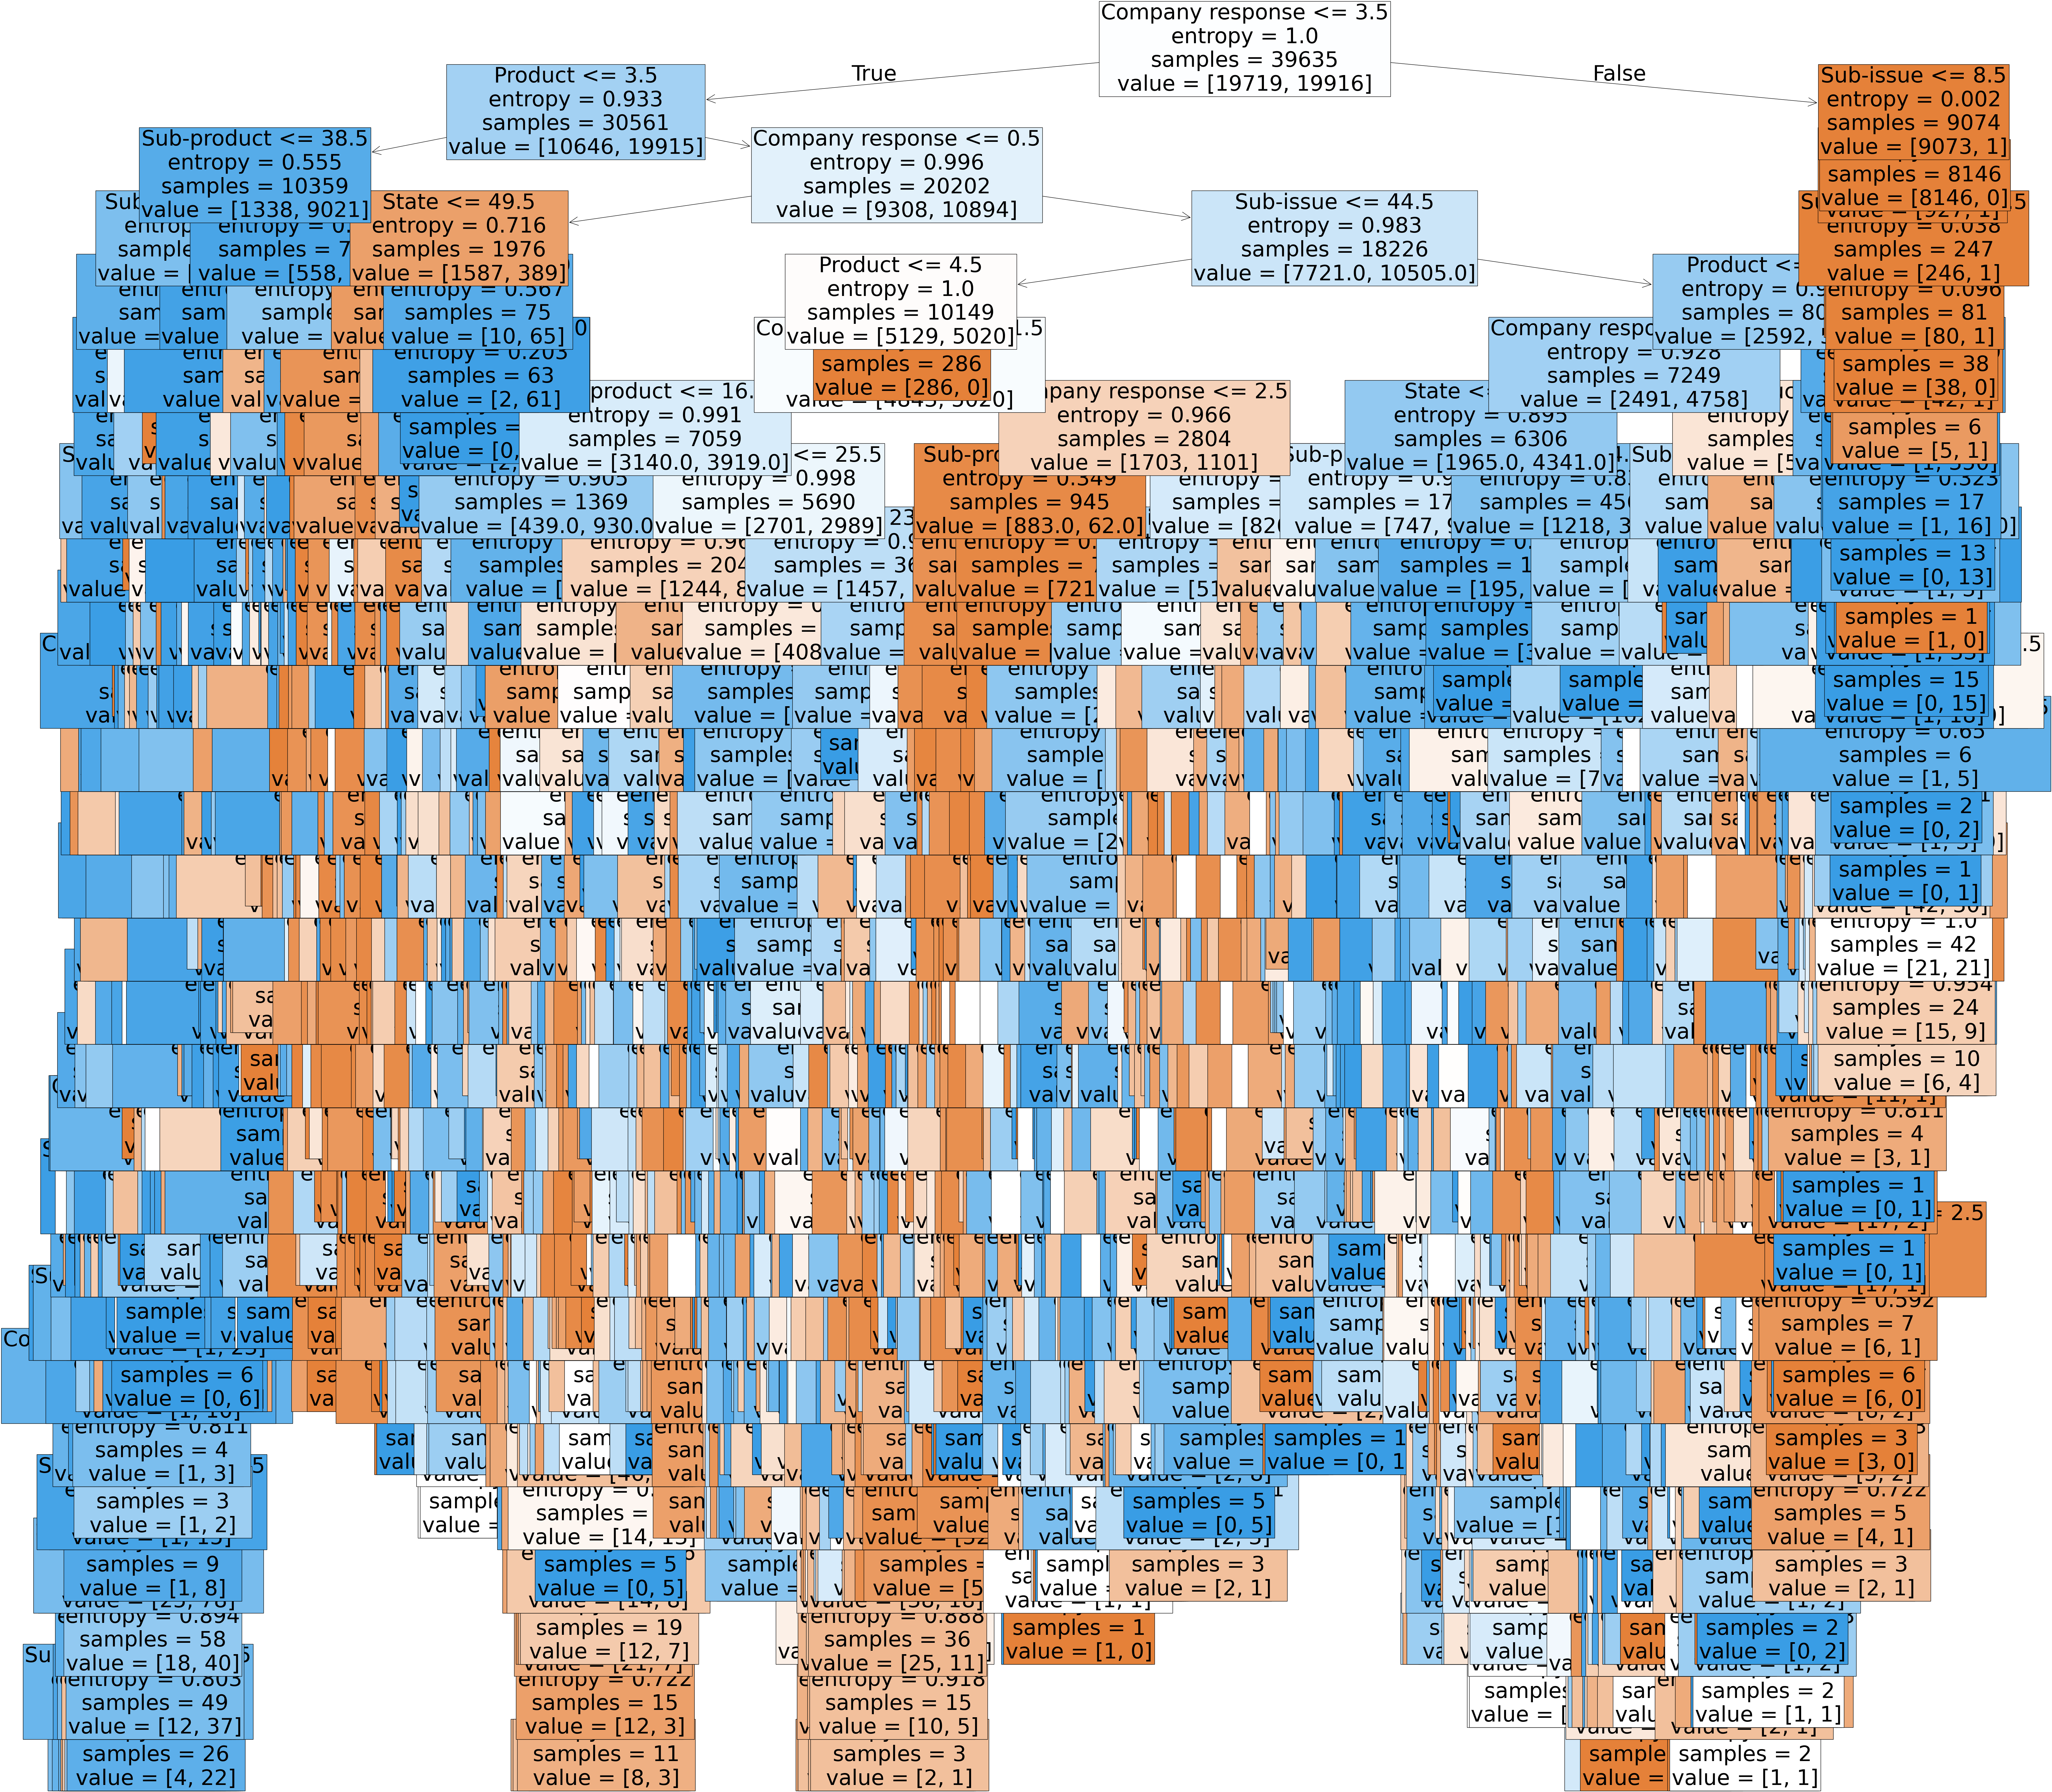

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(75, 75))
plot_tree(tree_class_def, feature_names=feature_names, filled=True, fontsize=50)

In [28]:
y_probs = pd.DataFrame(tree_class_def.predict_proba(X_test)[:, 1])
y_probs

0
0     1.00000
1     1.00000
2     0.00000
3     0.00000
4     0.00000
...       ...
9904  0.00000
9905  0.28754
9906  1.00000
9907  0.10000
9908  1.00000

[9909 rows x 1 columns]

In [ ]:
y_pred=(y_probs >= 0.455)

In [30]:
y_pred

0
0      True
1      True
2     False
3     False
4     False
...     ...
9904  False
9905  False
9906   True
9907  False
9908   True

[9909 rows x 1 columns]

Mejor umbral (threshold) para F1: 0.44999999999999984
Mejor F1 obtenido: 0.9293687842500508


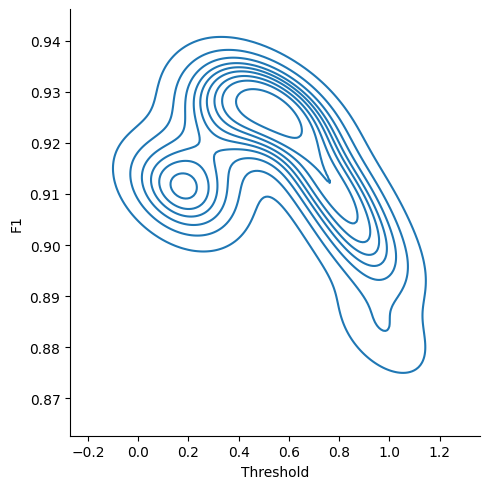

In [31]:
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score
thresholds = np.arange(.1, 1, 0.01)

best_threshold = 0
best_f1 = 0
lista={}
for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_probs > t).astype(int)
    
    
    # Calcular F1 para ese threshold
    current_f1 = f1_score(y_test, y_pred_t)
    lista[t]=current_f1
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t


print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")
sns.displot(pd.DataFrame(list(lista.items()), columns=["Threshold", "F1"]),  x="Threshold", y="F1", kind="kde")


In [32]:
pd.DataFrame(list(lista.items()), columns=["Threshold", "F1"])

Threshold        F1
0        0.10  0.907999
1        0.11  0.907999
2        0.12  0.909126
3        0.13  0.909525
4        0.14  0.909891
..        ...       ...
85       0.95  0.892308
86       0.96  0.886573
87       0.97  0.883920
88       0.98  0.882413
89       0.99  0.879513

[90 rows x 2 columns]

Mejor umbral (threshold) para F1: 0.45099999999999996
Mejor F1 obtenido: 0.9297608234937935


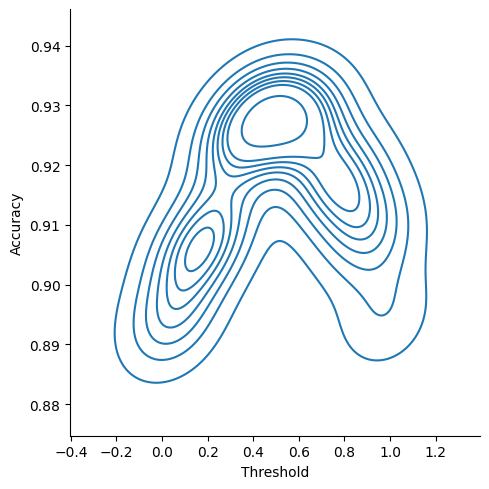

In [33]:
import numpy as np
thresholds = np.arange(.001, 1, 0.01)

best_threshold = 0
best_f1 = 0
lista={}
for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_probs > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = accuracy_score(y_test, y_pred_t)
    lista[t]=current_f1    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")

sns.displot(pd.DataFrame(list(lista.items()), columns=["Threshold", "Accuracy"]),  x="Threshold", y="Accuracy", kind="kde")

In [34]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)

In [35]:
import os 
import pickle
os.chdir("../models")

with open('modelo_timely_tree_def.pkl', 'wb') as f:
    pickle.dump(tree_class_def, f)

inntene varios max depth primero 40 luego 14.
Lo deje en 13 paporque

In [ ]:
objeto.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])